In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cell_samples.csv')

In [5]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### This dataset is suited for a classification task, as the goal is to predict whether a sample belongs to one of two classes: benign(ক্যান্সারবিহীন) (2) or malignant(ক্যান্সারবাহী) (4).

In [7]:
df.shape

(699, 11)

In [9]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [11]:
if df.duplicated().sum() > 0:
    print('Duplicated Value Exist')
else:
    print('No Duplicate Value Exist')

Duplicated Value Exist


In [13]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [17]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce').notnull().astype(int)
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [13]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,1,3,1,1,2
3,1016277,6,8,8,1,3,1,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
df.Class.value_counts()

Class
2    458
4    241
Name: count, dtype: int64

C:\Users\Ashraful\AppData\Local\Temp\ipykernel_4696\1722633757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette=['#1f77b6', '#ff7f0e'])  # Blue and Orange


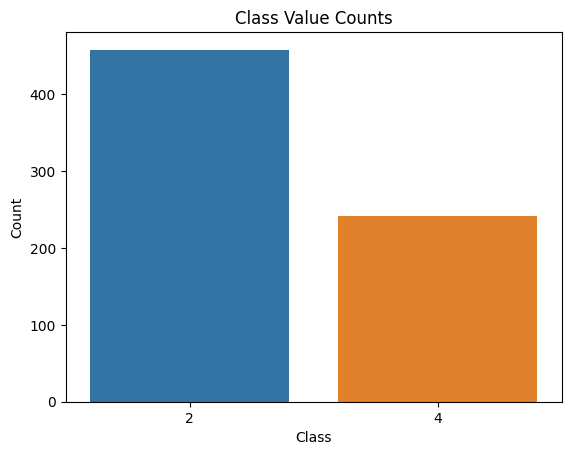

In [21]:
sns.countplot(data=df, x='Class', palette=['#1f77b6', '#ff7f0e'])  # Blue and Orange

# Add labels and title
plt.title('Class Value Counts')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

In [23]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,1,3,1,1,2
3,1016277,6,8,8,1,3,1,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [25]:
X = df.drop('Class', axis = 1)

In [27]:
X

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,1,3,2,1
2,1015425,3,1,1,1,2,1,3,1,1
3,1016277,6,8,8,1,3,1,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,1
695,841769,2,1,1,1,2,1,1,1,1
696,888820,5,10,10,3,7,1,8,10,2
697,897471,4,8,6,4,3,1,10,6,1


In [29]:
y = df['Class']

In [31]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

## Split the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 10)
(559,)
(140, 10)
(140,)


In [39]:
clf = RandomForestClassifier()

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:


# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.14%
